In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_total = 'data_classifier_total.csv'
df = pd.read_csv(csv_total)
df[:5]

,SNR,OSR,Power,category
0,82.392828,128,0.023437,2orSCSDM
1,59.543951,512,0.004077,2orSCSDM
2,77.585194,128,0.006584,2orSCSDM
3,59.093084,512,0.005573,2orSCSDM
4,65.833770,256,0.000744,2orSCSDM


In [3]:
X = df[['SNR','OSR','Power']]
X[:5]

,SNR,OSR,Power
0,82.392828,128,0.023437
1,59.543951,512,0.004077
2,77.585194,128,0.006584
3,59.093084,512,0.005573
4,65.833770,256,0.000744


In [4]:
y = df['category']
y[:5]

0    2orSCSDM
1    2orSCSDM
2    2orSCSDM
3    2orSCSDM
4    2orSCSDM
Name: category, dtype: object

In [5]:
models = list(set(y))

In [6]:
dict = {m:i for m,i in zip(models,range(len(models)))}
dict

{'2orSCSDM': 0, '3orCascadeSDM': 1, '211CascadeSDM': 2, '2orGMSDM': 3}

In [7]:
y_lista = y.tolist()

In [8]:
def replace_list(xs, dict):
    return [dict.get(item, item) for item in xs]

y_rep = replace_list(y_lista,dict)
set(y_rep)

{0, 1, 2, 3}

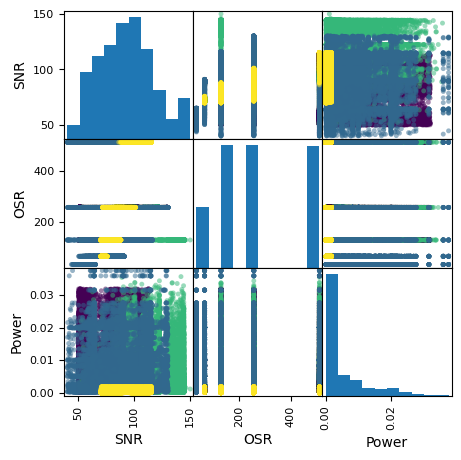

In [9]:
sp = pd.plotting.scatter_matrix(X, c=y_rep, figsize=(5,5), s=50, alpha=.5)

## ESTA ES LA BUENA (DATASET TOTAL)

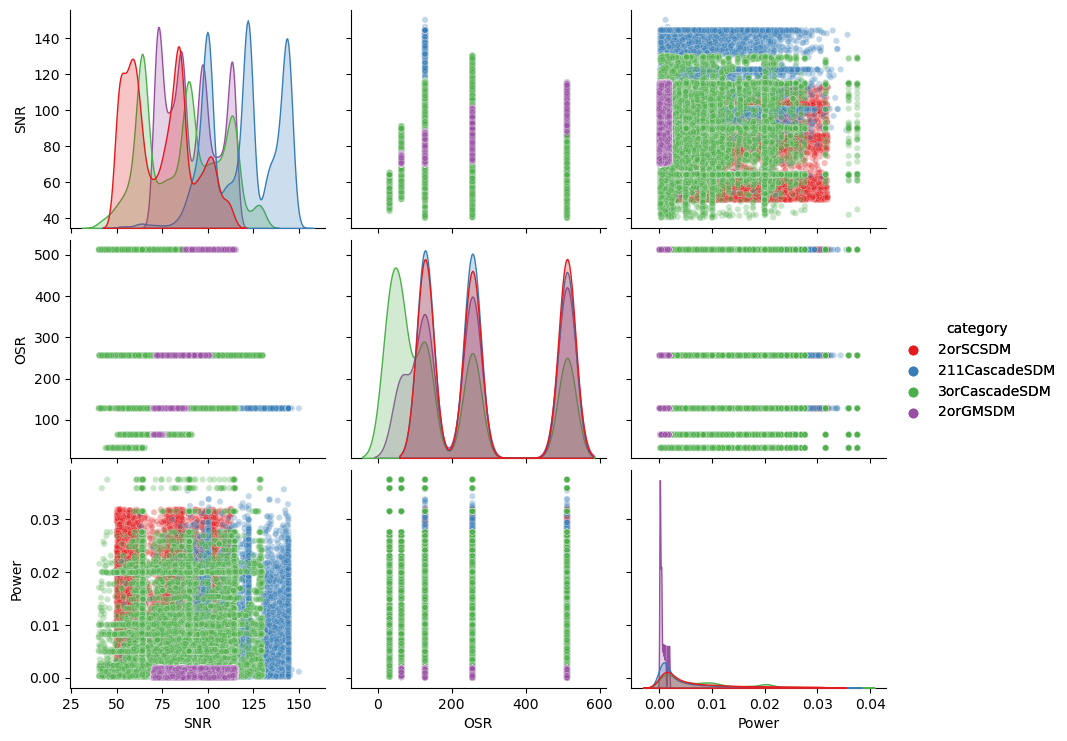

In [29]:
import seaborn as sns

kws = {'s':20, 'alpha':0.3}

scatter_matrix = sns.pairplot(df, hue='category', palette='Set1', plot_kws=kws)


# Añadir leyenda
scatter_matrix.add_legend()

plt.savefig('ScatterMatrix_Total')

# Mostrar el gráfico
plt.show()

In [18]:
csv_train = 'data_classifier_train.csv'
dft = pd.read_csv(csv_train)

## CONJUNTO DE ENTRENAMIENTO

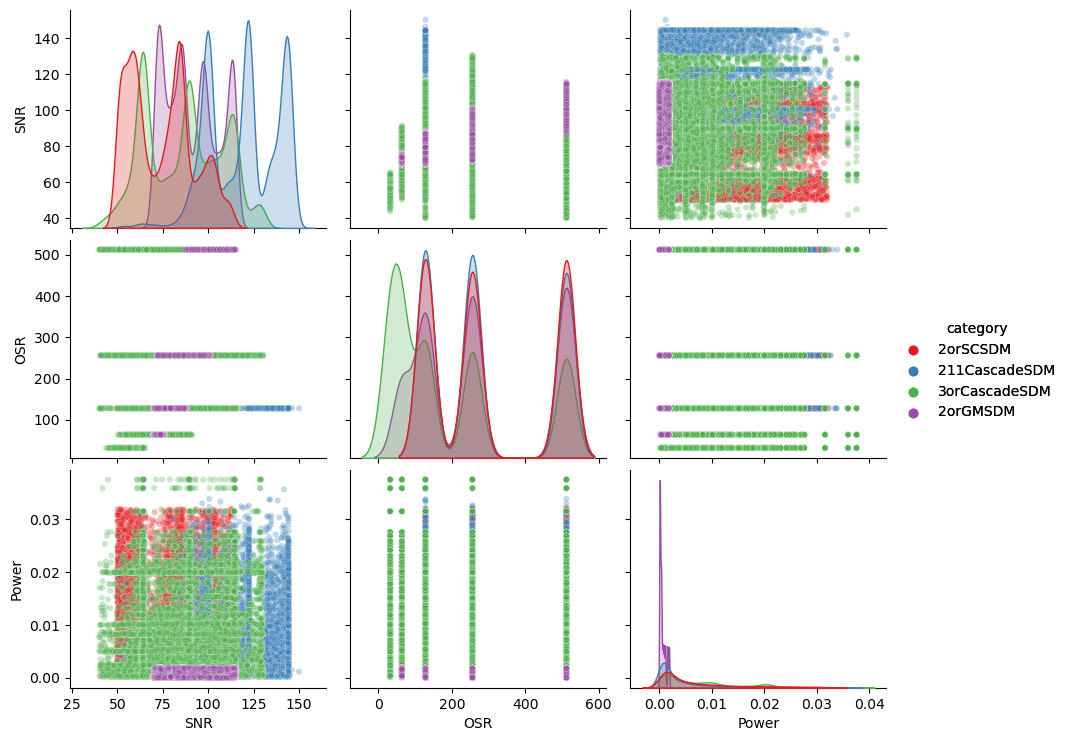

In [19]:
scatter_matrix = sns.pairplot(dft, hue='category', palette='Set1', plot_kws=kws)

# Añadir leyenda
scatter_matrix.add_legend()

plt.savefig('ScatterMatrix_Train')

# Mostrar el gráfico
plt.show()

In [22]:
y_names = list(set(y.tolist()))
y_names

['211CascadeSDM', '2orGMSDM', '2orSCSDM', '3orCascadeSDM']

In [23]:
Column_Names=X.columns.to_list()

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(df[Column_Names])
df[Column_Names]=scaled_values

In [24]:
X_scaled = df[Column_Names]
X_scaled

,SNR,OSR,Power
0,0.385114,0.200000,0.623872
1,0.177472,1.000000,0.108245
2,0.341424,0.200000,0.175032
3,0.173374,1.000000,0.148100
4,0.234631,0.466667,0.019489
...,...,...,...
65331,0.673075,1.000000,0.010713
65332,0.420830,0.200000,0.022480
65333,0.518912,1.000000,0.000000
65334,0.275655,0.066667,0.028814


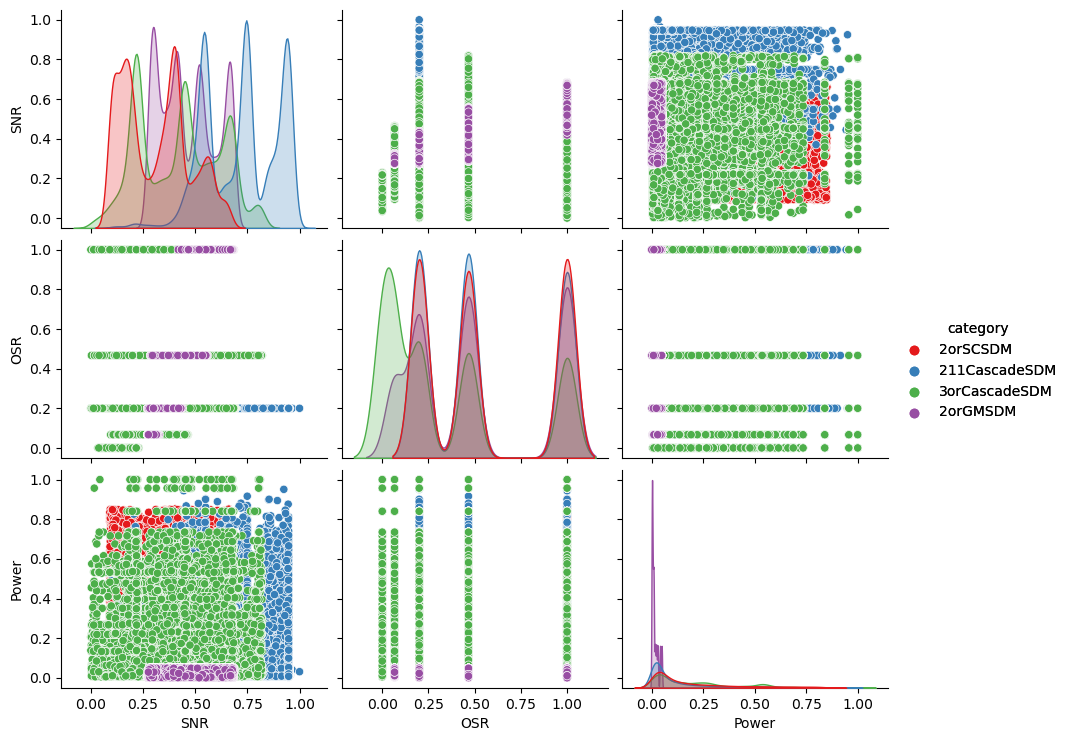

In [58]:
scatter_matrix_scaled = sns.pairplot(df, hue='category', palette='Set1')

# Añadir leyenda
scatter_matrix_scaled.add_legend()

# Guardar imagen
plt.savefig('TotalSM.png')

# Mostrar el gráfico
plt.show()

In [25]:
X_array = X_scaled.values
y_array = y.values
y_array

array(['2orSCSDM', '2orSCSDM', '2orSCSDM', ..., '2orGMSDM', '2orGMSDM',
       '2orGMSDM'], dtype=object)

In [31]:
y_rep[:5]

[2, 2, 2, 2, 2]

In [27]:
X_array[1,1]

1.0

In [37]:
X_array[True, 1]

array([[0.17747176, 1.        , 0.10824518]])

In [38]:
X_array

array([[0.38511374, 0.2       , 0.62387193],
       [0.17747176, 1.        , 0.10824518],
       [0.34142377, 0.2       , 0.1750324 ],
       ...,
       [0.51891239, 1.        , 0.        ],
       [0.27565488, 0.06666667, 0.02881362],
       [0.66907627, 1.        , 0.01071294]])

In [39]:
X_array[2,1]

0.2

In [40]:
X_array[False,1]

array([], shape=(0, 3), dtype=float64)

In [45]:
y_col = df['category'].map({'2orSCSDM':'r','211CascadeSDM':'b','3orCascadeSDM':'g','2orGMSDM':'y'})

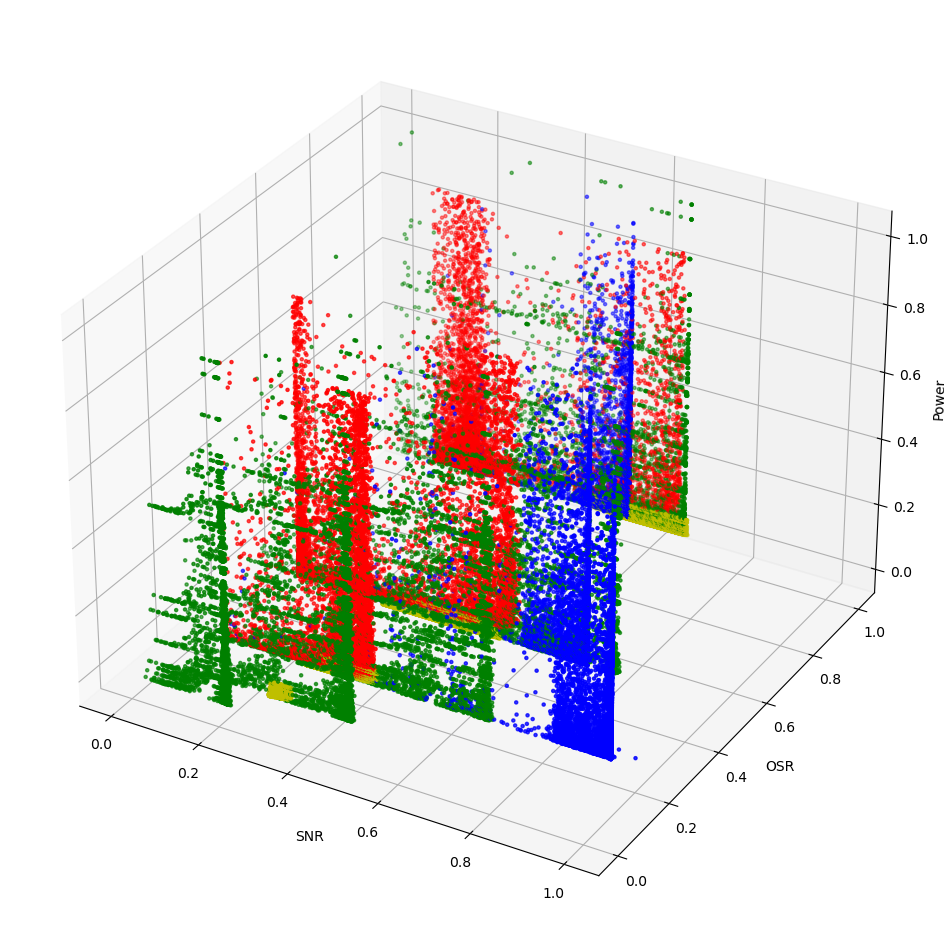

In [57]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
ax.scatter(df['SNR'], df['OSR'], df['Power'], c=y_col, marker='.')

# Configurar etiquetas de ejes
ax.set_xlabel('SNR')
ax.set_ylabel('OSR')
ax.set_zlabel('Power')

plt.savefig('Total3D.png')

# Mostrar el gráfico 3D
plt.show()

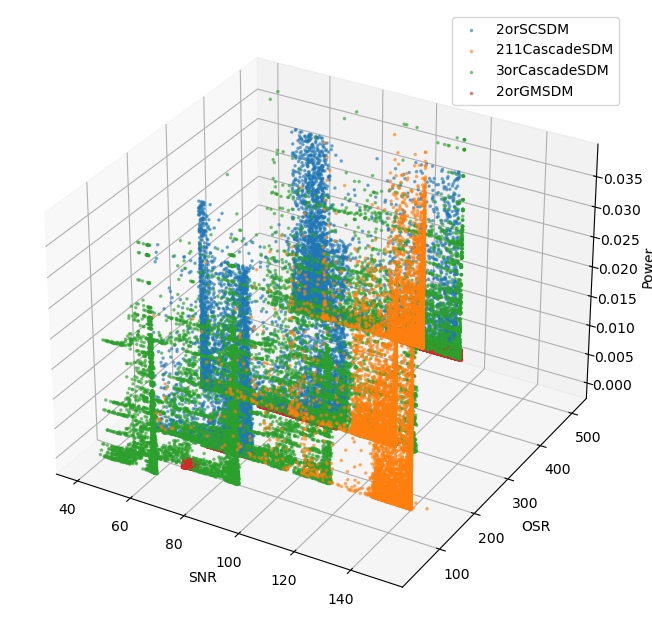

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a color palette for the categories
palette = sns.color_palette(n_colors=len(df['category'].unique()))

# Plot each category separately with a legend
for i, cat in enumerate(df['category'].unique()):
    subset = df[df['category'] == cat]
    ax.scatter(subset['SNR'], subset['OSR'], subset['Power'], label=cat, c=[palette[i]], s=10, alpha=0.5, marker='.')

# Set axis labels
ax.set_xlabel('SNR')
ax.set_ylabel('OSR')
ax.set_zlabel('Power')

# Add a legend
ax.legend()

# Save the plot
plt.savefig('3D_Total')

# Show the plot
plt.show()

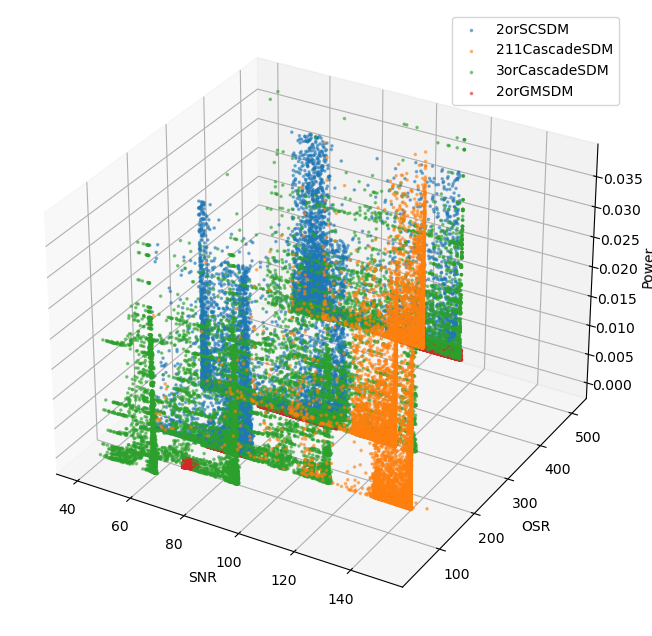

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a color palette for the categories
palette = sns.color_palette(n_colors=len(dft['category'].unique()))

# Plot each category separately with a legend
for i, cat in enumerate(dft['category'].unique()):
    subset = dft[dft['category'] == cat]
    ax.scatter(subset['SNR'], subset['OSR'], subset['Power'], label=cat, c=[palette[i]], s=10, alpha=0.5, marker='.')

# Set axis labels
ax.set_xlabel('SNR')
ax.set_ylabel('OSR')
ax.set_zlabel('Power')

# Add a legend
ax.legend()

# Save the plot
plt.savefig('3D_Train')

# Show the plot
plt.show()